In [2]:
'''DATA CLEANING'''

from calendar import day_abbr
import requests
import urllib
import json
import csv
# f = open('Desktop/NextMunch/next-munch/json_files/cuisines.json')
# data = json.load(f)
# print(len(data))
url2 = "https://worldwide-restaurants.p.rapidapi.com/search"

dietary_reqs = ['Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options', 'Halal', 'Kosher']
#2nd page
new_url = "https://api.tripadvisor.com/api/internal/1.14/location/186338/restaurants?base_geocodes_on=citymaps&currency=GBP&is_restaurant_filters_v2=true&lang=en_US&limit=50&offset=50&restaurant_tagcategory_standalone=186338&supports_relevance=true"

headers = {
	"content-type": "application/x-www-form-urlencoded",
	"X-RapidAPI-Key": "3b11ee2336msh5791c275fc5dbc6p11fa37jsn3cafb1ed4e82",
	"X-RapidAPI-Host": "worldwide-restaurants.p.rapidapi.com"
}
restaurant_list = ['restaurants']
address_list= ['address']
category_list = ['category']
cuisine_list = ['cuisine']
dietary_list = ['dietary requirements']
phone_list = ['phone No']
price_list = ['price']
rating_list = ['rating']
num_revs_list = ['num_reviews']
index2 = 0
# temp_list = []
new_list = []

def get_API_values(url, header, index):
    print(index)
    if index == 2900:
        f = open('APIvals.csv', 'w')
        for i in range(len(restaurant_list)):
                # string = '{'
                if i == 0:
                    string = f'index;{restaurant_list[i]};{address_list[i]};{category_list[i]};{price_list[i]};{phone_list[i]};{cuisine_list[i]};{dietary_list[i]};{rating_list[i]};{num_revs_list[i]}\n'
                else:
                    string = f'{i-1};{restaurant_list[i]};{address_list[i]};{category_list[i]};{price_list[i]};{phone_list[i]};{cuisine_list[i]};{dietary_list[i]};{rating_list[i]};{num_revs_list[i]}\n'
                # string = f'{dietary_list[i]}\n'
                # string += '},\n'
                f.write(string)
                # f.write('\n')
        
       
        f.close()
        # with open('APIvals.csv', 'a') as file:
        #     writer = csv.writer(file)
    
        #     # for i in range(len(cuisine_list)):
        #     #     string = '{'
        #     #     string += f'"restaurant": "{cuisine_list[i]}", "address": "{address_list[i]}"'
        #     #     string += '},'
        #         # print(string)
        #     writer.writerow(cuisine_list[0])
        #     writer.writerow('\n')

    else:
        
        
        payload = f"offset={index}&language=en_UK&limit=20500&location_id=186338&currency=GBP"
        response = requests.request("POST", url, data=payload, headers=header)
        print(response.status_code)
        if response.status_code != 204 and response.status_code != 504:
        
#             data = json.load(read_file)['results']['data']
            data = json.loads(response.text)['results']['data']
            for i in range(len(data)):
                # index = str(i)
                # print(data[index]['cuisine'])
                restaurant = data[i]['name']
                address = data[i]['address_obj']['street1']
                category = data[i]['category']['name']
                cuisine = data[i]['cuisine']
                rating = data[i]['rating']
                num_reviews = data[i]['num_reviews']
                try:
                    price = data[i]['price']
                    phone_number = data[i]['phone']
                except KeyError:
                    price = data[i]['price_level'].strip()
                    phone_number = 'NULL'

                if restaurant not in restaurant_list:
                    address_list.append(address)
                    restaurant_list.append(restaurant)
                    category_list.append(category)
                    phone_list.append(phone_number)
                    rating_list.append(rating)
                    num_revs_list.append(num_reviews)

                    number_price = []
                    temp_str = ''
                    for i in range(len(price)):
                        # print(price[i], i)
                        # print(price[len(price)-1])

                        if price[i].isdigit() == True:
                            if i == len(price)-1:
                                if price[i-1].isdigit() == False:
                                    number_price.append(str(price[i]))

                                else:
                                    pass
                            elif price[i].isdigit() and price[i+1].isdigit():
                                number_price.append(str(price[i])+ str(price[i+1]))
                            elif price[i].isdigit() and price[i-1].isdigit() == True:
                                pass
                            elif price[i].isdigit() and price[i+1].isdigit() == False:
                                number_price.append(str(price[i]))

                            else:
                                pass
                                # print(temp_str)
                        else:
                            pass


                    print(number_price)
                    # number_price = 0
                    if len(number_price) == 0:
                        final = 0
                    elif len(number_price) == 1:
                        final = int(number_price[0])
                    else:
                        final = int(number_price[0])+int(number_price[1])//2

                    price_list.append(final)
                    cuisine_temp_list = []
                    dietary_temp_list = []
                    for i in range(len(cuisine)-1):

                        if cuisine[i]['name'] not in dietary_reqs:
                            cuisine_temp_list.append(cuisine[i]['name'])
                        else:
                            dietary_temp_list.append(cuisine[i]['name'])

                    cuisine_list.append(cuisine_temp_list)
                    dietary_list.append(dietary_temp_list)

                    break

                    # temp_list = []


                    # for i in range(len(cuisine)):
                    #     temp[]
                    #     dietary_list.append(i['name'])
                        # print(i['name'])
               


            get_API_values(url, header, index+1)
            
        else:
            get_API_values(url, header, index+1)
#             pass


get_API_values(url2, headers, index2)

#     for cuisine in cuisines:

#             cuisine_list.append(cuisine['name'])

        # string=''
    
    # print('{cuisine: {csn}},').format(csn = cuisine_list[i])


0
200
['5', '9']
1
200
['18', '27']
2
200
['1', '8']
3
200
['5', '8']
4
200
[]
5
200
['27', '68']
6
200
['9', '27']
7
200
['14', '18']
8
200
[]
9
200
['5', '23']
10
200
[]
11
200
['4', '7']
12
200
['1', '14']
13
200
['6', '23']
14
200
[]
15
200
['30', '86']
16
200
[]
17
200
['9', '15']
18
200
['9', '27']
19
200
[]
20
200
[]
21
200
[]
22
200
[]
23
200
['6', '36']
24
200
[]
25
200
['27', '45']
26
200
[]
27
200
['18', '54']
28
200
['9', '27']
29
200
[]
30
200
['14', '36']
31
200
['17']
32
200
['14', '27']
33
200
[]
34
200
['5', '18']
35
200
['5', '50']
36
200
[]
37
200
['9', '21']
38
200
[]
39
200
['23', '36']
40
200
['5', '14']
41
200
['5', '15']
42
200
['14', '32']
43
200
['5', '14']
44
200
['9', '36']
45
200
['5', '16']
46
200
['2', '7']
47
200
['6', '20']
48
200
['18', '27']
49
200
[]
50
200
['41', '90']
51
200
[]
52
200
['3', '9']
53
200
['18', '41']
54
200
[]
55
200
[]
56
200
[]
57
200
['5', '40']
58
200
[]
59
200
[]
60
200
['27', '72']
61
200
['2', '9']
62
200
[]
63
200
['18', '45'

SSLError: HTTPSConnectionPool(host='worldwide-restaurants.p.rapidapi.com', port=443): Max retries exceeded with url: /search (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)')))

In [44]:
import numpy as np
import difflib
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
df = pd.read_excel("APIvals.xlsx", index_col = None)
df
# import pip
# pip3 install sklearn


,index,restaurants,address,category,price,phone No,cuisine,dietary requirements,rating,num_reviews,rating_actual
0,0,Devine Restaurant Coffee Bar,19 Vine Street,Restaurant,9,+44 20 7488 9929,"['Cafe', 'European', 'British']","['Vegan Options', 'Gluten Free Options']",5.0,295,59.000000
1,1,Bonoo Indian Tapas,675 Finchley Road,Restaurant,31,+44 20 7794 8899,"['Wine Bar', 'Indian', 'Contemporary', 'Street...","['Vegetarian Friendly', 'Vegan Options']",5.0,1713,342.600000
2,2,Nora Cafe,9 Wentworth Street,Restaurant,5,+44 20 7247 4992,"['Cafe', 'British', 'Grill']",['Vegetarian Friendly'],5.0,264,52.800000
3,3,Hibox,48 Goodge Street,Restaurant,9,+44 20 7580 9312,"['Lebanese', 'Mediterranean', 'Middle Eastern'...","['Vegetarian Friendly', 'Vegan Options', 'Halal']",5.0,212,42.400000
4,4,Indian Room,59 Bedford Hill,Restaurant,0,NaN,['Indian'],"['Vegetarian Friendly', 'Vegan Options', 'Halal']",5.0,1788,357.600000
...,...,...,...,...,...,...,...,...,...,...,...
2848,2848,Nancy Lam's Enak Enak,56 Lavender Hill,Restaurant,61,+44 20 7924 3148,"['Indonesian', 'Asian']",[],4.5,134,29.777778
2849,2849,The Goat Tavern,3 Stafford Street,Restaurant,12,+44 20 7629 0966,"['Bar', 'British', 'Pub']",[],4.0,132,33.000000
2850,2850,Haidilao Hot Pot,Greenwich Peninsula Peninsula Square,Restaurant,0,NaN,"['Chinese', 'Asian', 'Healthy']",['Vegetarian Friendly'],5.0,31,6.200000
2851,2851,Neat Burger,4 Princes Street,Restaurant,0,NaN,['Fast food'],"['Vegetarian Friendly', 'Vegan Options']",4.5,92,20.444444


In [45]:
# Address change from postcode to text descriptor
# add jageh ka link
# df
# selected_features = ['cuisine','dietary requirements', 'price', 'address']

# df['dietary requirements'] = df['dietary requirements'].fillna('')
combined_features = df['cuisine'] + ' ' + str(df['price']) + ' ' + df['dietary requirements'] + ' ' + str(df['address'])
print(combined_features) 
# df.head()

0       ['Cafe', 'European', 'British'] 0        9\n1 ...
1       ['Wine Bar', 'Indian', 'Contemporary', 'Street...
2       ['Cafe', 'British', 'Grill'] 0        9\n1    ...
3       ['Lebanese', 'Mediterranean', 'Middle Eastern'...
4       ['Indian'] 0        9\n1       31\n2        5\...
                              ...                        
2848    ['Indonesian', 'Asian'] 0        9\n1       31...
2849    ['Bar', 'British', 'Pub'] 0        9\n1       ...
2850    ['Chinese', 'Asian', 'Healthy'] 0        9\n1 ...
2851    ['Fast food'] 0        9\n1       31\n2       ...
2852    ['Bar', 'British', 'Pub'] 0        9\n1       ...
Length: 2853, dtype: object


In [46]:
vectorizer = TfidfVectorizer()

In [47]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [48]:
print(feature_vectors)

  (0, 110)	0.07406605499619946
  (0, 15)	0.07406605499619946
  (0, 58)	0.07406605499619946
  (0, 9)	0.07406605499619946
  (0, 122)	0.07406605499619946
  (0, 140)	0.07406605499619946
  (0, 113)	0.14813210999239892
  (0, 74)	0.07406605499619946
  (0, 142)	0.07406605499619946
  (0, 93)	0.07406605499619946
  (0, 11)	0.07406605499619946
  (0, 79)	0.14813210999239892
  (0, 32)	0.07406605499619946
  (0, 12)	0.07406605499619946
  (0, 72)	0.07406605499619946
  (0, 10)	0.07406605499619946
  (0, 160)	0.07406605499619946
  (0, 125)	0.07406605499619946
  (0, 62)	0.07406605499619946
  (0, 14)	0.07406605499619946
  (0, 144)	0.4443963299771968
  (0, 158)	0.07406605499619946
  (0, 1)	0.07406605499619946
  (0, 65)	0.3519459083056515
  (0, 71)	0.3519459083056515
  :	:
  (2852, 12)	0.08906490721493646
  (2852, 72)	0.08906490721493646
  (2852, 10)	0.08906490721493646
  (2852, 160)	0.08906490721493646
  (2852, 125)	0.08906490721493646
  (2852, 62)	0.08906490721493646
  (2852, 14)	0.08906490721493646
  (2852

In [49]:
similarity = cosine_similarity(feature_vectors)

In [50]:
print(similarity)

[[1.         0.60450601 0.7552302  ... 0.62775406 0.67054702 0.72131143]
 [0.60450601 1.         0.66392967 ... 0.63834927 0.77152922 0.72862141]
 [0.7552302  0.66392967 1.         ... 0.73170133 0.73519355 0.81761402]
 ...
 [0.62775406 0.63834927 0.73170133 ... 1.         0.70686744 0.75487829]
 [0.67054702 0.77152922 0.73519355 ... 0.70686744 1.         0.75848113]
 [0.72131143 0.72862141 0.81761402 ... 0.75487829 0.75848113 1.        ]]


In [51]:
# df.groupby('restaurants')['rating_actual'].count().head()
# df.sort_values(['rating_actual'],ascending=False).groupby('restaurants').head()

ratings = pd.DataFrame(df.sort_values(['rating', 'rating_actual'],ascending=False).groupby('restaurants').head())
ratings

,index,restaurants,address,category,price,phone No,cuisine,dietary requirements,rating,num_reviews,rating_actual
35,35,Pizza Union Spitalfields,25 Sandys Row,Restaurant,0,NaN,"['Pizza', 'Fast food']","['Vegetarian Friendly', 'Vegan Options']",5.0,3237,647.400000
6,6,Alexander The Great,8 Plender Street,Restaurant,22,+44 20 7388 1111,"['Mediterranean', 'Greek', 'International', 'C...","['Vegetarian Friendly', 'Vegan Options']",5.0,2994,598.800000
79,79,Bar 61 Restaurant,61A Streatham Hill,Restaurant,33,+44 20 8671 0444,"['Mediterranean', 'European', 'Spanish']","['Vegetarian Friendly', 'Vegan Options']",5.0,2541,508.200000
13,13,Pizza Union King's Cross,246 Pentonville Road,Restaurant,0,NaN,"['Italian', 'Pizza', 'Fast food']","['Vegetarian Friendly', 'Vegan Options']",5.0,2524,504.800000
9,9,Scarlett Green,4 Noel Street,Restaurant,0,NaN,"['Healthy', 'Australian', 'Fusion']","['Vegetarian Friendly', 'Vegan Options']",5.0,2246,449.200000
...,...,...,...,...,...,...,...,...,...,...,...
2627,2627,Carluccio's South Kensington,1 Old Brompton Road,Restaurant,0,NaN,"['Italian', 'Mediterranean']","['Vegetarian Friendly', 'Vegan Options']",3.5,864,246.857143
2449,2449,All Bar One Regent Street,289-293 Regent Street,Restaurant,11,+44 20 7636 8197,"['Bar', 'British', 'Wine Bar', 'International']","['Vegetarian Friendly', 'Vegan Options']",3.5,552,157.714286
2437,2437,Zetland Arms,2 Bute Street,Restaurant,12,+44 20 7589 3813,"['Bar', 'British', 'Pub', 'Grill']",[],3.5,519,148.285714
2613,2613,The Narrowboat,119 St. Peter's Street,Restaurant,0,NaN,"['Bar', 'British', 'Pub', 'Gastropub']","['Vegetarian Friendly', 'Vegan Options']",3.5,507,144.857143


<AxesSubplot:>

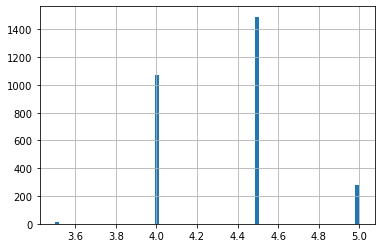

In [52]:
# plt.figure
ratings['rating'].hist(bins=70)

In [88]:
rest_reccomend = df.pivot_table(index='restaurants',values = ['price', 'rating', 'rating_actual'])
rest_reccomend.head()
# df.head()

,price,rating,rating_actual
restaurants,,,
129,13,5.0,14.400000
'O ver,22,4.5,91.777778
1 Lombard Street,59,4.0,139.000000
10 Greek Street,0,4.5,126.666667
100 Wardour St,38,4.5,512.888889


pip install --upgrade pandas

In [90]:
df['rating'].value_counts()

4.5    1491
4.0    1068
5.0     279
3.5      15
Name: rating, dtype: int64

index                                                                   1
restaurants                                            Bonoo Indian Tapas
address                                                 675 Finchley Road
category                                                       Restaurant
price                                                                  31
phone No                                                 +44 20 7794 8899
cuisine                 ['Wine Bar', 'Indian', 'Contemporary', 'Street...
dietary requirements             ['Vegetarian Friendly', 'Vegan Options']
rating                                                                5.0
num_reviews                                                          1713
rating_actual                                                       342.6
Name: 1, dtype: object

AttributeError: 'Series' object has no attribute 'Value'

In [213]:
# cuisine = ['Asian', ]
# cuisine = ['Spanish', 'British']
location = ['Liverpool Street', 'Soho', 'Mayfair']
budget = 20
# (df['cuisine'].str.contains('Asian')) & (df['cuisine'].str.contains('American'))

index_list = df[((df['restaurants'].str.contains('Soho'))| (df['restaurants'].str.contains('Mayfair')) | (df['restaurants'].str.contains('Liverpool Street'))) & ((df['price'] >=20-5) &(df['price'] <=20))].index.tolist()

for i in index_list:
    print(df.iloc[i])
    break
    

# if cuisine  in df['cuisine']:\
#     print(df['cuisine'].index)
# print(df['cuisine'].isin(cuisine).index.tolist())
# index_list = df[(df['cuisine'].str.contains(cuisine))].index.tolist()


index                                                        649
restaurants                                             Soho Joe
address                                       34 D'Arblay Street
category                                              Restaurant
price                                                         16
phone No                                        +44 20 7287 1777
cuisine                                             ['Lebanese']
dietary requirements    ['Vegetarian Friendly', 'Vegan Options']
rating                                                       4.5
num_reviews                                                 1336
rating_actual                                         296.888889
Name: 649, dtype: object
